__CORENTIN HENNION__

# Mini-projet DATA 2019-2020 : CORENTIN HENNION

## Introduction au projet

Il s'agit dans ce projet de construire un modèle prédictif du risque de défaut de paiement sur un crédit, en fonction de variables décrivant la personne bénéficiant de ce prêt ainsi que l'historique des remboursements sur les 6 derniers mois.

__Déroulement et évaluation :__ 
* Si vous choisissez de passer l'examen écrit du 1er juillet, votre projet ne sera pas noté. Ce mini-projet est néanmoins l'occasion de traiter en pratique un problème de classification (les PC ne traitant que de problèmes de régression) et de réutiliser des notions vues dans les PC sur un nouveau jeu de données.
* __Si vous choisissez de ne pas passer l'examen écrit du 1er juillet, vous devrez rendre un rapport de projet.__ Les consignes précises pour ce rapport __sont dans le fichier `consignes-projet.pdf`__. Vous pouvez travailler à deux ou plus ensemble sur le projet, mais devrez rendre un rapport individuel.
* À la fin du projet, vous pourrez comparer vos prédictions sur des données dont l'étiquette ne vous est pas donnée pour l'instant à leurs étiquettes réelles.

Le mini-projet est moins guidé que les PC, mais vous pouvez souvent _réutiliser du code_ des précédentes PC. La PC du __20 mai__ est consacrée à la découverte du projet. C'est l'occasion de découvrir les données et de commencer à vous attaquer à la première partie. La deuxième partie est moins guidée, et vous aurez besoin des notions abordées lors des séances des 3 et 10 juin pour l'aborder.

__Mise en contexte :__ Les données sont proches de données réelles. Vous semblerait-il intéressant, pour une banque, de
déployer un tel modèle, entrainé sur ses données ? Quelle performance vous semblerait acceptable pour
votre cas d’usage ? Quels risques pourrait-on encourir à déployer un tel modèle ? Voyez-vous des sources
de biais possibles, qui pourraient conduire à de mauvaises performances et/ou à des discriminations ?
Quel(s) autre(s) usage(s) pourrait-on faire de ces données ? Quels sont des usages actuels de modèles prédictifs dans l’industrie bancaire ? Un des buts du chapitre 6, que nous traiterons lors du prochain cours, est de vous amener à réfléchir à ce genre de questions.

__REPONSE__:
Les banques accordent de nombreux crédits, notamment à la consommation, et proposent des remboursements en plusieurs fois ou même en différé. Ce modèle de consommation les expose à des risques de défaut de paiement. Prédire les individus "à risques" permettrait de refuser ou modifier l'offre faite au client pour assurer la stabilité financière de la banque et la péréniser. De plus le secteur bancaire possède énormément de données sur ses clients (salaire, patrimoine, statut maritaux, etc), certainement bien plus que n'importe quel autre secteur, ce qui favorise les banques pour contruire des modèles prédictifs. Entraîner un modèle sur ses données serait donc particulièrment adapté à ce modèle de prédictions, et donc très intéressant pour la banque, dont le suivi des clients sera plus aisé et efficace contre le défaut de paiement. 

Performance et risques :
Il faut cependant s'assurer que le modèle est bon, pour des raisons économiques : la banque gagne de l'argent en accordant des crédits (lorsqu'ils sont remboursés), et pour des raisons éthiques : ce genre de modèle se base sur les données du client et pourrait donc être soupçonner des juger "à la tête du client". Il faudrait ainsi analyser les composantes principales de notre modèle : il serait par exemple tendancieux aujourd'hui que la composante principale de la prédiction soit le sexe. 
Ensuite il faut s'assurer de la performance du modèle soit bonne. Ceci est difficile à chiffrer. Cela peut dépendre du point de vue : si la banque cherche à tout prix à éviter les défauts de paiement, il est nécessaire que les prédictions positives (de défaut) soient très précises, alors que si la banque veut simplement éviter les défauts de paiement les plus probables sans en refuser trop, c'est plutôt les prédictions négatives qui doivent être très précises.

Biais :
Les sources de biais peuvent être multiples et sont parfois peut prévisibles. On peut imaginer un biais discriminant sur l'âge dans le cas des données banquaires, à l'image du biais du sexe dans l'exemple du recrutement d'Amazon; si la clientèle de la banque est plutôt agée (banque de plus haut standing par exemple), il se pourrait qu'un modèle entraîné sur ses données soit discriminant pour la clientèle jeune.

Usage actuel et autre :
Dans le secteur bancaire, en plus d'aider pour les crédits à la consommation, des données similaires pourraient être utiles pour accorder des prêts (immobilier, étudiant, etc), ou pour gérer les plafonds de dépenses des comptes clients. Un autre secteur qui se rapproche et qui détient beaucoup de données client également est l'assurance, pour qui des modèles prédictifs augmentent et augmenteront grandement l'efficacité.
Il existe déjà divers usage dans l'industrie bancaire, ou en cours de développement : dertimnation de la capacté de remboursement de crédit (étudié dans ce projet), proposition d'offres aux petits commercants (CommBak, Australie), détection de fraude à la carte de paiement, anticipation du risque que le client retire ses fonds, crédit en peer-to-peer (entre particuliers)(Lendit, Corée).

## Première partie (à partir du 20 mai 2020)

## 1. Données

Les données publiques, c'est-à-dire celles qui sont étiquetées, sont contenues dans le fichier `../data/credit_public.csv`. Chaque ligne correspond à un prêt. Chaque prêt est décrit par les variables suivantes :
```
    Credit_total : montant du crédit (€)
    Sexe : 
       1 = M
       2 = F
    Education : 
        1 = Études supérieures, Bac+5 ou plus ; 
        2 = Études supérieures < Bac+5 ; 
        3 = Bac ; 
        4 = Autre / inconnu
    Statut_marital : 
        1 = mariage ; 
        2 = célibat ; 
        3 = autre / inconnu
    Age : en années
    Statut_mois_1 -- Statut_mois_6 : statut du remboursement sur les 6 mois précédents 
        (Statut_mois_1 : le mois précédent ; Statut_mois_6 : 6 mois avant). 
        -2 = pas de consommation sur le crédit ;
        -1 = payé à l'échéance ; 
        0 = système de crédit renouvelable plutôt qu'à l'échéance ; 
        1 = payé avec 1 mois de retard ; 
        2 = payé avec 2 mois de retard ; ... ; 
        8 = payé avec 8 mois de retard ou plus.
    Montant_mois_1 -- Montant_mois_6 : montant dû à chacun des 6 mois précédents 
        (Montant_mois_1 : le mois précédent ; Montant_mois_6 : 6 mois avant)
    Versement_mois_1 -- Versement_mois_6 : montant remboursé (€) à chacun des 6 mois précédents
        (Versement_mois_1 : le mois précédent ; Versement_mois_6 : 6 mois avant)
    Defaut_de_paiement : défaut de paiement 
        0 = non
        1 = oui 
```


__Question :__ Quelle est la nature du problème d'apprentissage ? Quelles sont les étiquettes ?

__Réponse :__C'est un problème de classification, il a pour but de prédire pour les individus leurs étiquettes, qui sont le défaut de paiement (1 défaut, 0 à jour).

### 1.1 Chargement des données

In [96]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Corentin Hennion\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log', 'grid']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [97]:
import pandas as pd

In [98]:
df_public = pd.read_csv('credit_public.csv', sep='\t')

In [99]:
df_public.head()

,Credit_total,Sexe,Education,Statut_marital,Age,Statut_mois_1,Statut_mois_2,Statut_mois_3,Statut_mois_4,Statut_mois_5,...,Montant_mois_4,Montant_mois_5,Montant_mois_6,Versement_mois_1,Versement_mois_2,Versement_mois_3,Versement_mois_4,Versement_mois_5,Versement_mois_6,Defaut_de_paiement
0,1190,1,2,2,27,2,2,0,0,0,...,234,214,219,133,38,12,12,12,16,0
1,5238,1,1,1,45,1,2,0,0,0,...,3779,3860,3938,0,181,136,143,143,293,0
2,1190,2,2,2,22,0,0,0,0,0,...,705,722,688,47,36,24,27,26,48,1
3,1905,2,1,2,27,-1,-1,2,-1,-1,...,57,10,69,309,0,57,10,76,175,1
4,1667,1,2,2,27,0,0,0,0,0,...,2004,1135,1173,98,57,60,43,57,114,0


### 1.2 Création d'un jeu d'entrainement et d'un jeu de test

__Consigne :__ Créer deux array `X_public` et `y_public` contenant, respectivement, les données non étiquetées et les étiquettes.

In [100]:
X_public = np.array(df_public.drop(columns=['Defaut_de_paiement']))
y_public = np.array(df_public['Defaut_de_paiement'])

Regardons combien d'étiquettes de chaque classe `y_public` contient :

In [101]:
# Les étiquettes positives sont des 1, et les négatives des 0,
# on peut aussi utiliser
print("Nombres d'étiquettes positives : %d" % (np.sum(y_public)))
print("Nombres d'étiquettes négatives : %d" % ((np.size(y_public) - np.sum(y_public))))
# Il vaut quand même mieux vérifier qu'il n'y a bien que des 0 et des 1
print("Valeurs uniques dans y_public :", np.unique(y_public))

Nombres d'étiquettes positives : 1011
Nombres d'étiquettes négatives : 3480
Valeurs uniques dans y_public : [0 1]


Nous allons maintenant créer un jeu d'entrainement (80%) des données et un jeu de test (20%) des données, en respectant les proportions relatives d'exemples de chaque classe dans les deux jeux (on parle de _stratification_).

In [102]:
from sklearn import model_selection

In [103]:
# Use 20% for testing (X_test, y_test) and the rest for training (X_train, y_train)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_public, y_public, test_size=0.20,
                                                                    stratify=y_public, # stratification
                                                                    random_state=92)

Vérifiez que `X_train`, `X_test`, `y_train`, `y_test` ont bien la forme que vous attendiez.

In [104]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(X_train)

((3592, 23), (899, 23), (3592,), (899,), numpy.ndarray)

__Question :__ Pourquoi stratifier les jeux de données ?

__Réponse :__
On stratifie le jeu de données pour respecter les proportions d'individus selon une caractéristique, ici en défaut de paiement ou à jour, dans nos jeux d'entraînement et de test. L'échantillon présente ainsi les mêmes proportions d'individus dans chaque strate que la population, permettant ainsi de limiter un premier biais dû à l'aléatoire.

## 2. Visualisation des variables

__Consigne :__ Choisissez des représentations appropriées pour visualiser les différentes variables de votre jeu de données, y compris les étiquettes. 

Qu'observez-vous ? Quelles transformations vous sembleraient judicieuses ? 

Text(0.5, 1.0, 'Defaut_de_paiement')

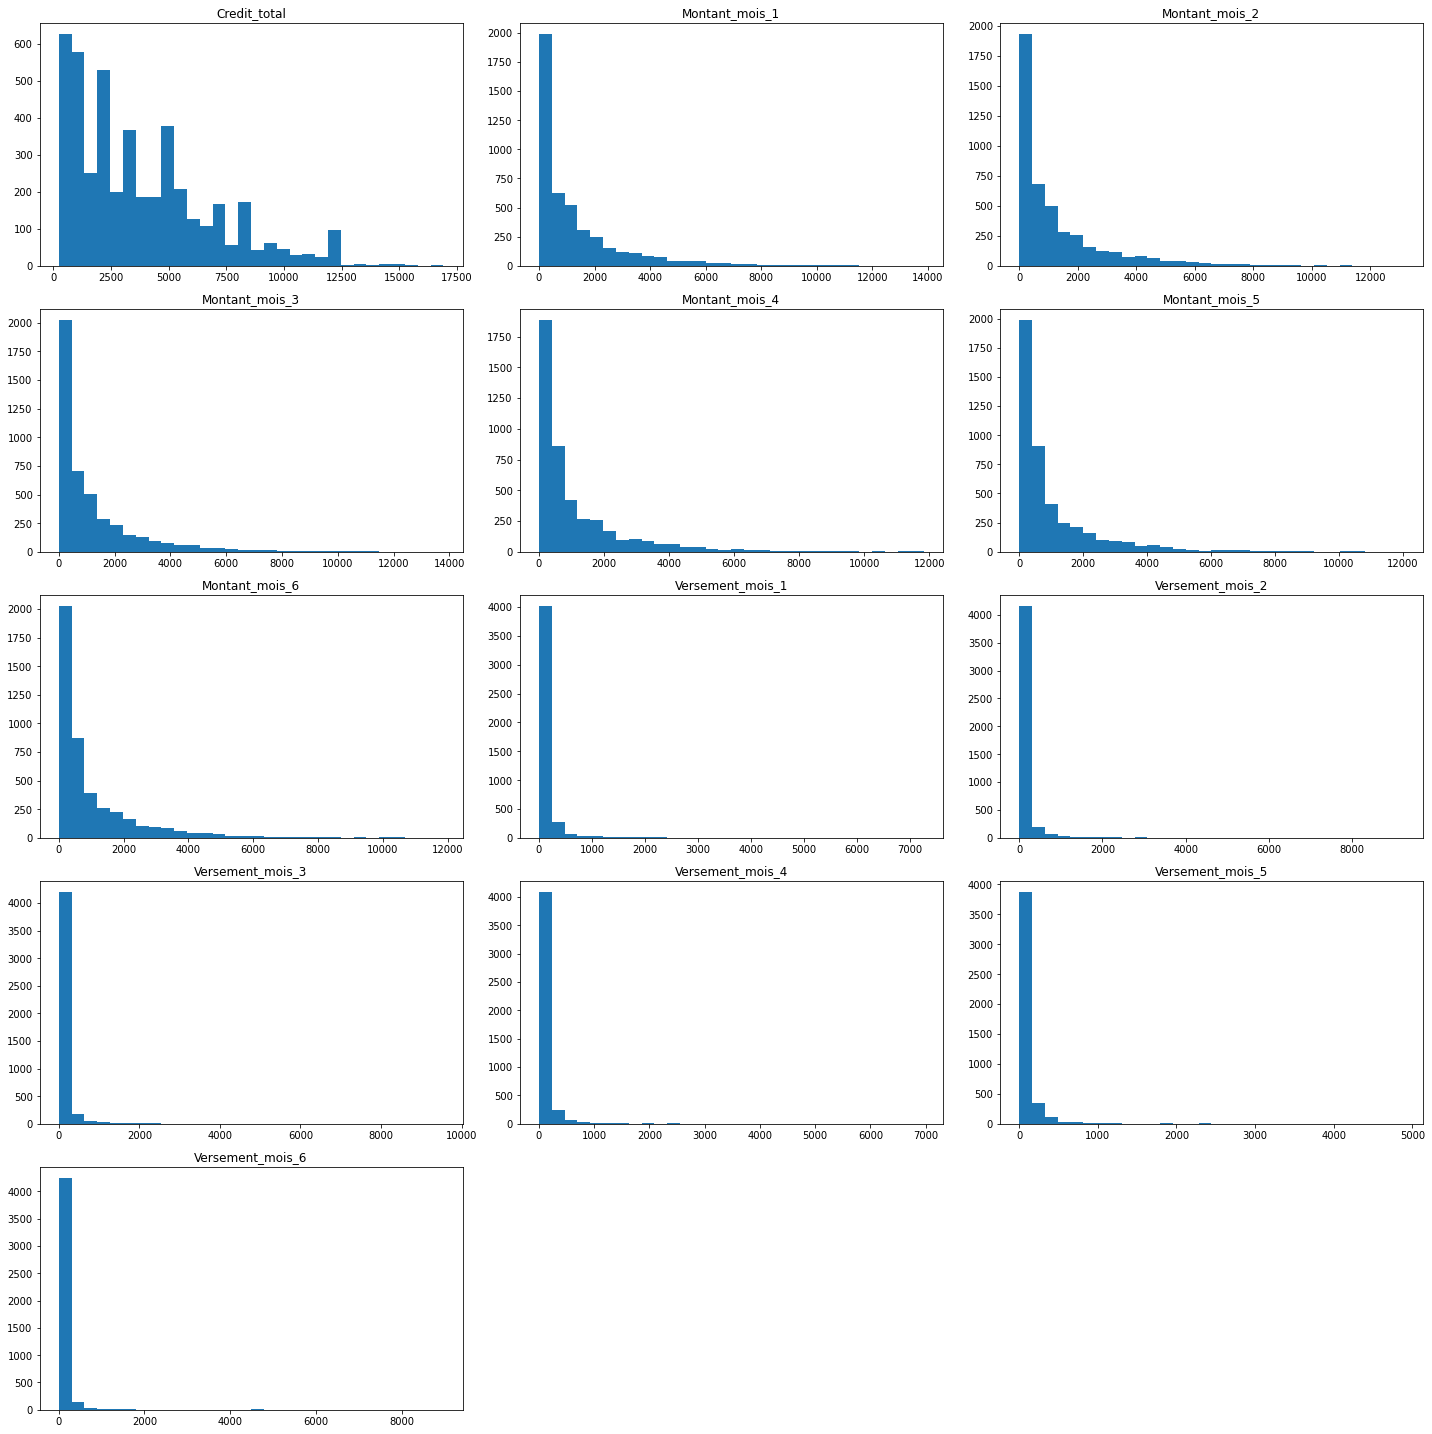

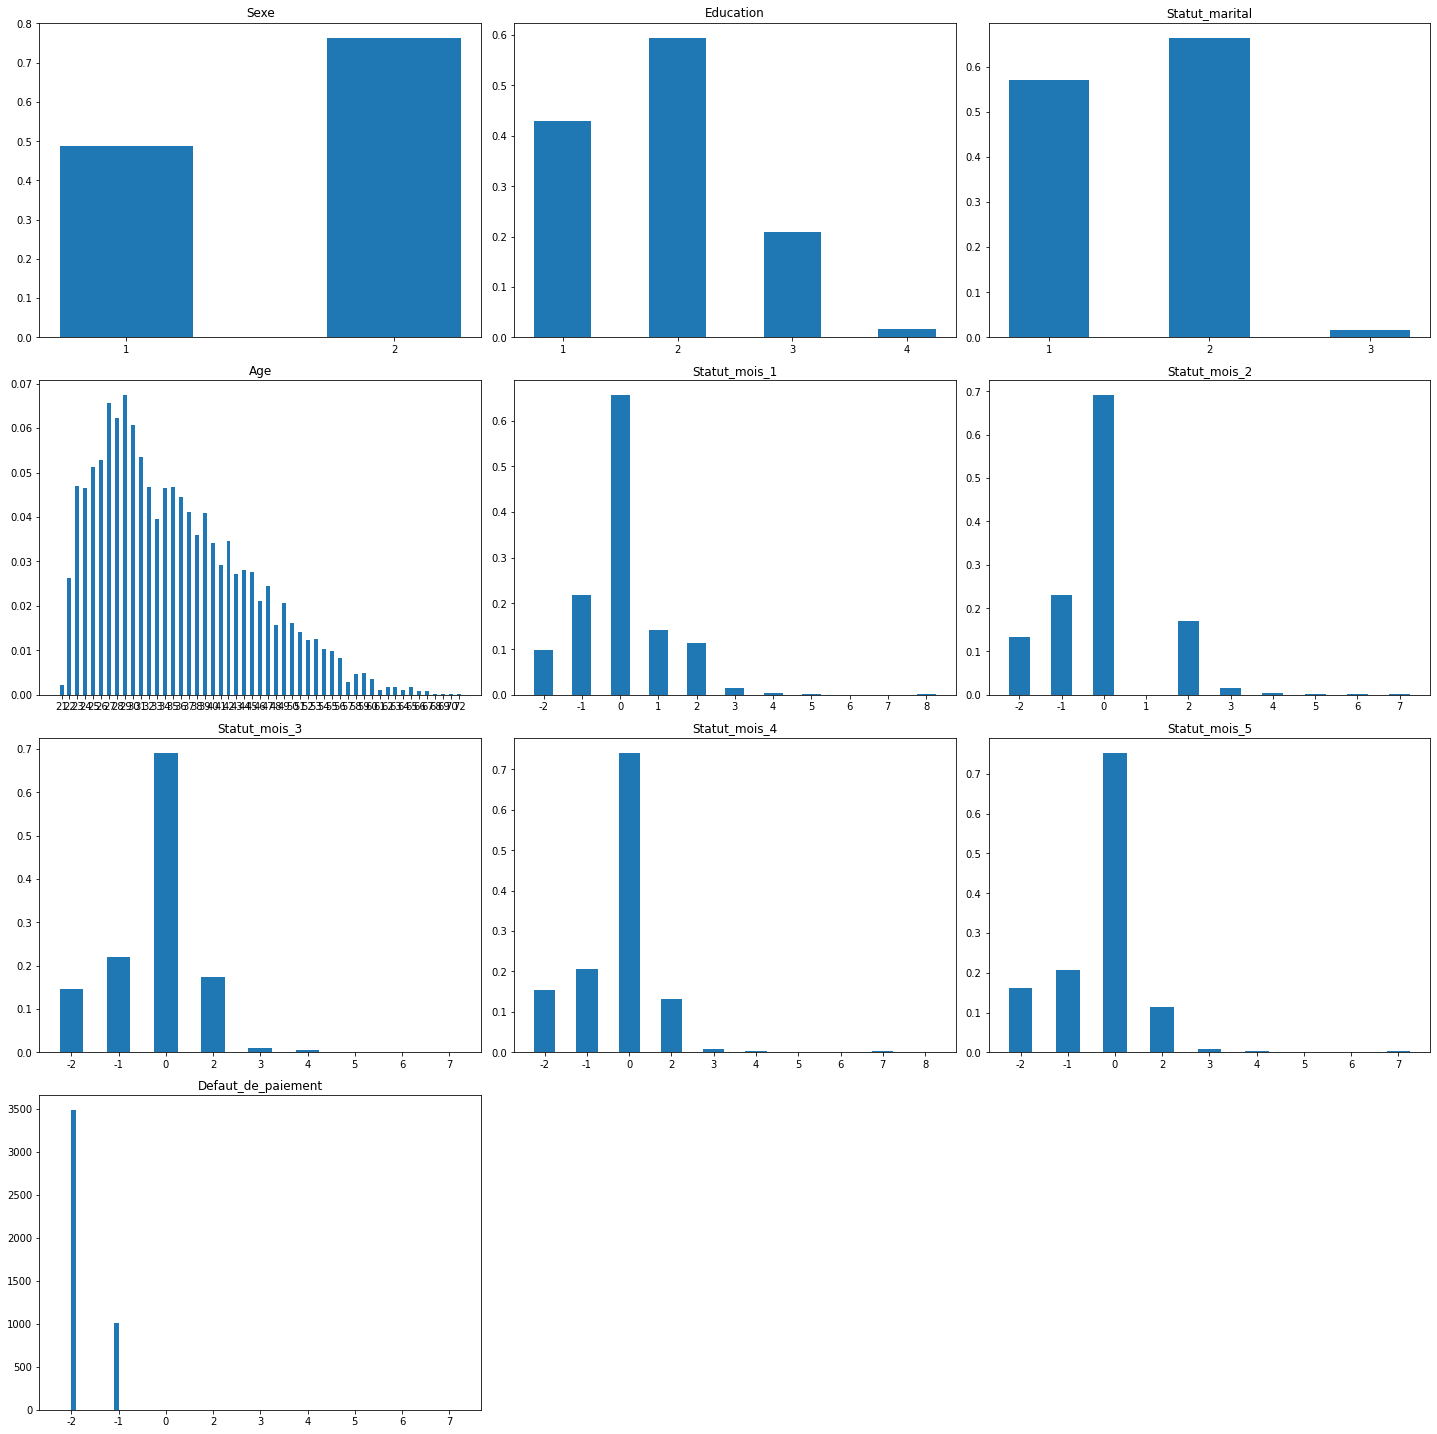

In [105]:
#Traitement différent pour les données continues et discrètes
continuous_features = ['Credit_total','Montant_mois_1','Montant_mois_2','Montant_mois_3','Montant_mois_4','Montant_mois_5','Montant_mois_6','Versement_mois_1','Versement_mois_2','Versement_mois_3','Versement_mois_4','Versement_mois_5','Versement_mois_6']
discrete_features = ['Sexe','Education','Statut_marital','Age','Statut_mois_1', 'Statut_mois_2','Statut_mois_3','Statut_mois_4','Statut_mois_5','Statut_mois_6']

features = list(df_public.drop(columns=['Defaut_de_paiement']).columns)

continuous_features_idx = [features.index(feat_name) for feat_name in continuous_features]
discrete_features_idx = [features.index(feat_name) for feat_name in discrete_features]

fig = plt.figure(figsize=(20, 20))

# Histograms for continuous features
for (plot_idx, feat_idx) in enumerate(continuous_features_idx):
    # create a subplot in the (plot_idx+1) position of a 2x2 grid
    ax = fig.add_subplot(5, 3, (plot_idx+1))
    # plot the histogram of feat_idx
    h = ax.hist(X_public[:, feat_idx], bins=30, edgecolor='none')
    # use the name of the feature as a title for each histogram
    ax.set_title(features[feat_idx])
# espacement entre les subplots
fig.tight_layout(pad=1.0)

# Bar plots for discrete features
fig = plt.figure(figsize=(20, 20))

for (plot_idx, feat_idx) in enumerate(discrete_features_idx):
    # create a subplot in the (plot_idx+1) position of a 1x3 grid
    ax = fig.add_subplot(4, 3, (plot_idx+1))

    feature_values = np.unique(X_public[:, feat_idx])
    frequencies = [(float(len(np.where(X_public[:, feat_idx]==value)[0]))/X_train.shape[0]) \
                   for value in feature_values]
    
    b = ax.bar(range(len(feature_values)), frequencies, width=0.5, 
               tick_label=list([int(n) for n in feature_values]))
    
    # use the name of the feature as a title for each histogram
    ax.set_title(features[feat_idx])
fig.tight_layout(pad=1.0)
                
                
#create histogramme for 'defaut de paiement'
plt.hist(y_public, bins=10, edgecolor='none')
plt.title('Defaut_de_paiement')

__Réponse :__ Les features continues n'ayant pas les  mêmes unités et échelles, il est nécessaire de les normaliser pour qu'elle aient toute proportionnellement le même poids dans les prédictions. Pour les features discrètes il est nécessaire de procéder à un encodage, comme one hot, pour la même raison car les représentations des statuts par un chiffre sont arbitraires pour le moment. (je ne comprends pas pourquoi les valeurs de y_public dans l'histogramme sont -2 et -1 qui devraient correspondre respectivement à 0 et 1)

## 3. Prétraitement des variables

__Consigne :__ Mettez en œuvre les transformations de variables qui vous semblent judicieuses afin de créer deux array, `X_train_processed` et `X_test_processed`, contenant vos données pré-traitées.

__Conseils :__ 
* Faites principalement attention à l'amplitude des valeurs prises par les variables continues.
* L'encodage one-hot peut aussi se faire avec `scikit-learn` : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
Attention alors 
    * à utiliser l'argument `sparse=True` pour conserver un array numpy plutôt qu'une structure de matrice sparse ; 
    * à garder la trace de quelles nouvelles colonnes correspondent à quelles variables, par exemple grâce à l'attribut `categories_`.
* Vous pouvez appliquer des transformations différentes à des colonnes différentes en vous restreignant à ces colonnes, par exemple `X_train[:, continuous_features_idx]`.
* Vous pouvez concaténer des array numpy  grâce à `np.hstack((array_1, array_2))`.

Attention aussi à appliquer vos transformations aux données de test.

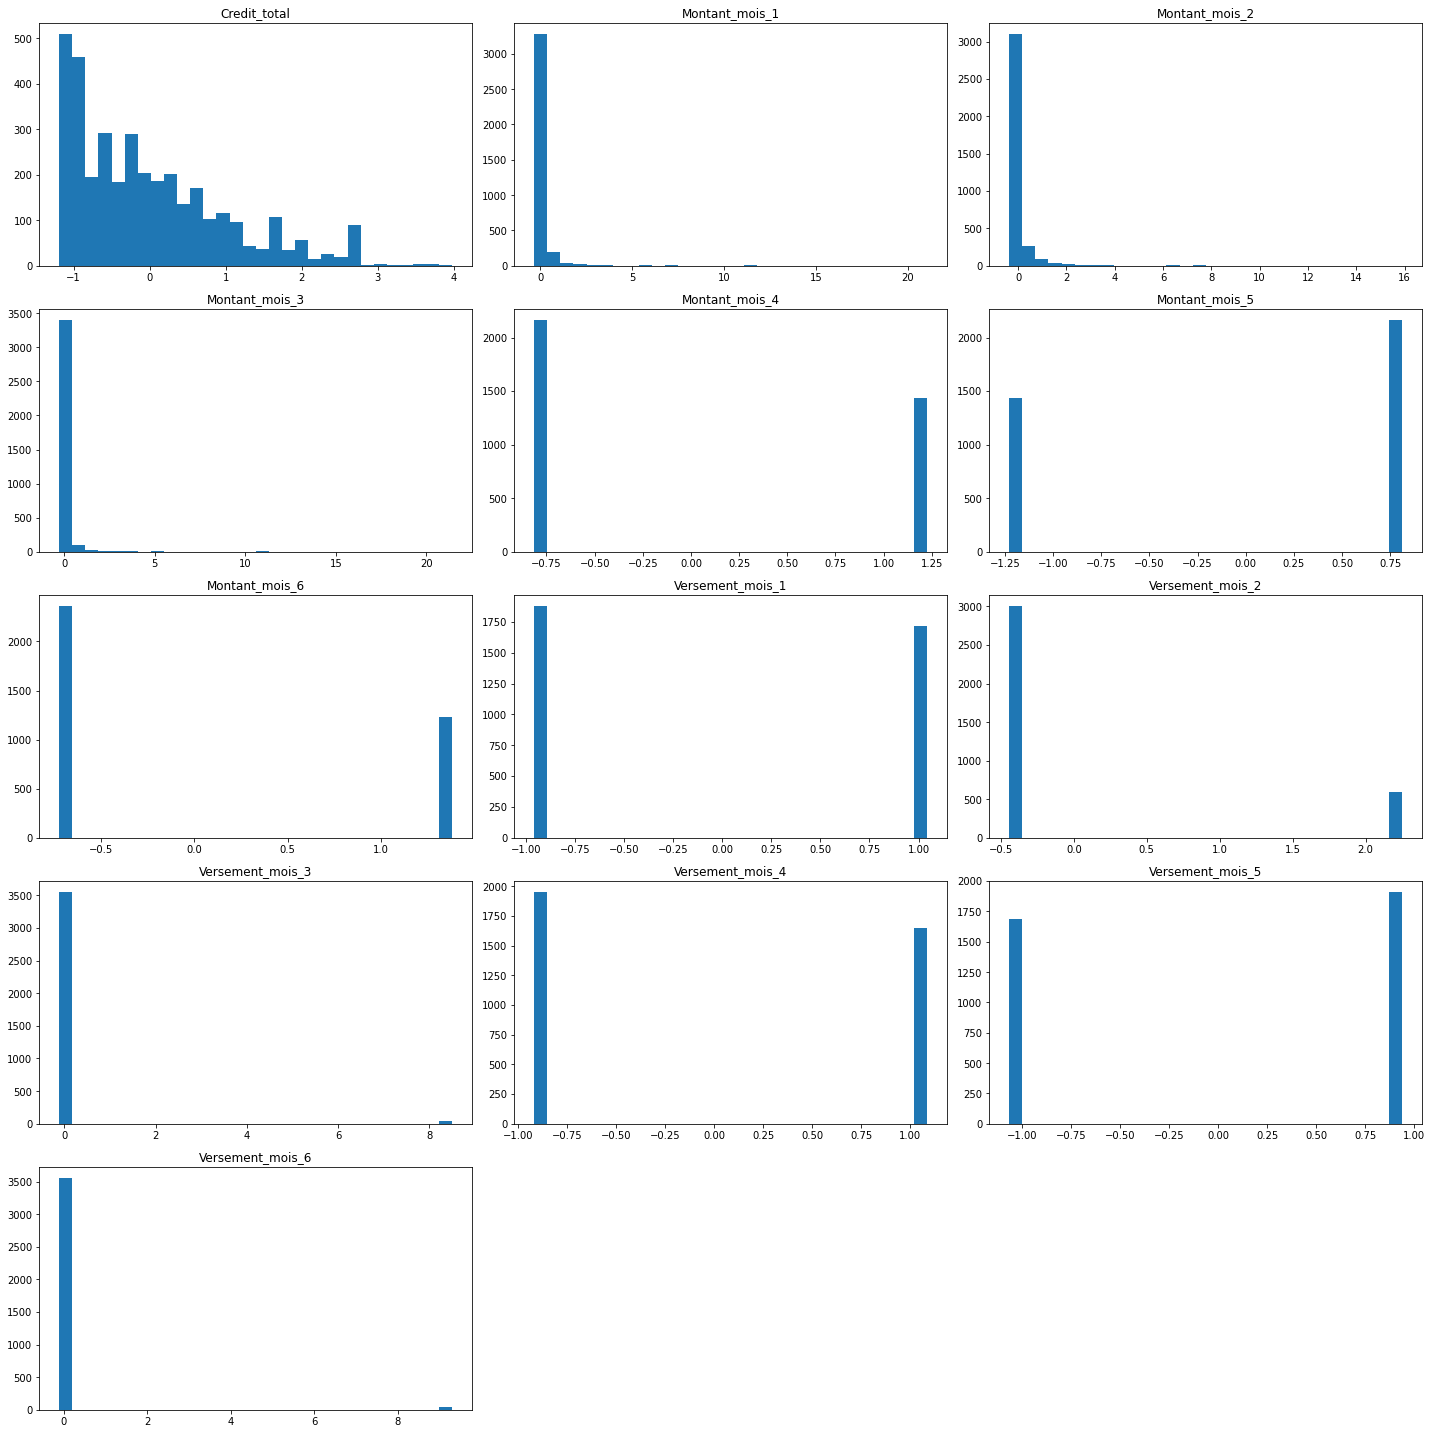

In [106]:
#try with onehotencoder library but error
    #from sklearn.preprocessing import OneHotEncoder

    #apply one hot encoder to discrete features to prevent different weights of value for these categories
    #enc = OneHotEncoder()
    #enc.fit(X_train)
    #X_train_processed = enc.transform(X_train)
    #X_test_processed = enc.transform(X_test)

    #onehot_categories = enc.categories_
    #print(onehot_categories)
    
#try with dummies, need to go back to dataframes
df_dummies = pd.get_dummies(df_public, columns=['Sexe','Education','Statut_marital'] + [f'Statut_mois_{i}' for i in range(1,7)])


X = np.array(df_dummies.drop(columns=['Defaut_de_paiement']))
y = np.array(df_dummies['Defaut_de_paiement'])

#necessity to define again with this method 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20,
                                                                    stratify=y, # stratification
                                                                    random_state=92)

from sklearn import preprocessing
#scale continuous features
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_processed = std_scale.transform(X_train)
X_test_processed = std_scale.transform(X_test)


#visualisation des variables continues standardisées de X_train_processed
continuous_features = ['Credit_total','Montant_mois_1','Montant_mois_2','Montant_mois_3','Montant_mois_4','Montant_mois_5','Montant_mois_6','Versement_mois_1','Versement_mois_2','Versement_mois_3','Versement_mois_4','Versement_mois_5','Versement_mois_6']

features = list(df_public.drop(columns=['Defaut_de_paiement']).columns)

continuous_features_idx = [features.index(feat_name) for feat_name in continuous_features]
discrete_features_idx = [features.index(feat_name) for feat_name in discrete_features]

fig = plt.figure(figsize=(20, 20))

# Histograms for continuous features
for (plot_idx, feat_idx) in enumerate(continuous_features_idx):
    # create a subplot in the (plot_idx+1) position of a 2x2 grid
    ax = fig.add_subplot(5, 3, (plot_idx+1))
    # plot the histogram of feat_idx
    h = ax.hist(X_train_processed[:, feat_idx], bins=30, edgecolor='none')
    # use the name of the feature as a title for each histogram
    ax.set_title(features[feat_idx])
# espacement entre les subplots
fig.tight_layout(pad=1.0)

In [107]:
print('Les nouvelles colonnes de X_train et X_test après encodage sont :', np.array(df_dummies.columns))

Les nouvelles colonnes de X_train et X_test après encodage sont : ['Credit_total' 'Age' 'Montant_mois_1' 'Montant_mois_2' 'Montant_mois_3'
 'Montant_mois_4' 'Montant_mois_5' 'Montant_mois_6' 'Versement_mois_1'
 'Versement_mois_2' 'Versement_mois_3' 'Versement_mois_4'
 'Versement_mois_5' 'Versement_mois_6' 'Defaut_de_paiement' 'Sexe_1'
 'Sexe_2' 'Education_1' 'Education_2' 'Education_3' 'Education_4'
 'Statut_marital_1' 'Statut_marital_2' 'Statut_marital_3'
 'Statut_mois_1_-2' 'Statut_mois_1_-1' 'Statut_mois_1_0' 'Statut_mois_1_1'
 'Statut_mois_1_2' 'Statut_mois_1_3' 'Statut_mois_1_4' 'Statut_mois_1_5'
 'Statut_mois_1_6' 'Statut_mois_1_7' 'Statut_mois_1_8' 'Statut_mois_2_-2'
 'Statut_mois_2_-1' 'Statut_mois_2_0' 'Statut_mois_2_1' 'Statut_mois_2_2'
 'Statut_mois_2_3' 'Statut_mois_2_4' 'Statut_mois_2_5' 'Statut_mois_2_6'
 'Statut_mois_2_7' 'Statut_mois_3_-2' 'Statut_mois_3_-1' 'Statut_mois_3_0'
 'Statut_mois_3_2' 'Statut_mois_3_3' 'Statut_mois_3_4' 'Statut_mois_3_5'
 'Statut_mois_3_6' 'St

__Commentaire :__
On observe que les variables continues ont bien été standardisées et que l'encodage one hot des variables discrètes a été réalisé : le nombre de colonnes a augmenté pour représenter ces variables, autant de colonnes que de valeurs discrètes possibles pour une variable discrète.

## 4. (Pour aller plus loin) Réduction de dimension

__Attention : Lors de la PC4, je vous recommande de passer directement à la section 5 avant de revenir sur cette section.__

__Consigne :__ Effectuez une ACP sur les données d'entraînement (avant et/ou après prétraitement). 
* Quelle proportion de la variance est expliquée par les deux premières composantes ? 
* Combien de composantes choisir pour réduire la dimensionalité des données ? 
* Représentez ces données selon les deux premières composantes et colorez les points selon leur étiquette. Pensez-vous que la tâche de classification va être facile ? Difficile ?
* Vous pouvez aussi faire plusieurs graphiques, PC1 vs PC2, PC2 vs PC3, et ainsi de suite, pour visualiser plus de dimensions.

## 5. Premier modèle de classification

### 5.1 Algorithme des k plus proches voisins

Nous n'avons pas encore vu d'algorithme permettant d'entraîner un modèle de classification. Nous allons donc commencer avec un modèle simple : celui des __k plus proches voisins__ (ou __kNN__, pour _k nearest neighbors_).

Dans ce modèle, la valeur de la fonction de décision en x est la proportion d'individus d'étiquette positive parmi les k plus proches voisins de x au sein des points du jeu d'entraînement ; k est fixé.

__Question :__ S'agit-il d'un modèle paramétrique ou non ? 

__Réponse :__ La méthode des plus proches voisins est une méthode non paramétrique. En effet il n'existe pas une fonction de prédiction définie par des paramétres permettant de prédire l'étiquette à partir des données. On utilise ici la distance euclidienne pour rapprocher l'étiquette recherchée des étiquettes des individus connus et proches.

Nous n'avons pas encore vu comment choisir la valeur d'un hyperparamètre tel que k. Nous allons commencer par utiliser un algorithme des k plus proches voisins avec k fixé à k=5.

__Question :__ Pourquoi avoir choisi k impair ?

__Réponse :__ Un k impair permet de toujours pouvoir dire si l'étiquette est plutôt positive ou négative. Si k est pair, il pourrait y avoir autant de plus proches voisins positifs que négatifs et on ne pourrait décider alors (la valeur de la fonction de décision serait alors 0.5).

__Consigne :__ En utilisant la classe `KNeighborsClassifier` du module `neighbors` de `sklearn`, utilisez l'algorithme des 5 plus proches voisins pour entrainer un modèle sur votre jeu d'entraînement.

Documentation https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [108]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train_processed, y_train)

KNeighborsClassifier()

### 5.2 Métrique d'évaluation

Il existe de nombreuses métriques pour évaluer les performances d'un algorithme de classification, et il s'agit ici d'en choisir une adaptée à notre problème.

__Question :__ Nous avons jusqu'à présent considéré uniquement le _nombre d'erreurs_ d'un modèle de classification. Quel serait dans notre cas la proportion d'erreurs (nombre d'erreurs/nombre de prédictions) d'un modèle prédisant systématiquement la classe négative ? 

In [109]:
#le nombre d'erreurs serait le nombre d'individu à jour de leur paiement
#prenons les erreurs sur y_public pour estimer la proportion
nb_mistakes = np.size(y_public) - np.sum(y_public)
nb_pred = np.size(y_public)

prop_mistakes = nb_mistakes/nb_pred
print("La proportion d'erreur d'un tel modèle est :", prop_mistakes)

La proportion d'erreur d'un tel modèle est : 0.7748830995323981


Dans le cas d'un problème de classification binaire où le nombre d'individus entre les différentes classes est _déséquilibré_, on peut s'intéresser à plusieurs métriques, dont par exemple le F-score. 

Vous trouverez sa définition dans la documentation du module `metrics` de `sklearn` : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score et https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics

Vous pouvez aussi vous plonger plus en détails dans les différentes métriques d'évaluation d'un classifieur binaire [sur OpenClassrooms](https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308256-evaluez-un-algorithme-de-classification-qui-retourne-des-valeurs-binaires).

__Question :__ Quel serait dans notre cas le F-score d'un modèle prédisant sytématiquement la classe négative ? La classe positive ?

In [110]:
#definition of true positive (tp) false positive (fp) and false negative (fn) is necessary to find the F-score

#systematic positive prediction :
tp = np.size(y_test) - np.sum(y_test)
fp = np.sum(y_test)
fn = 0

precision = tp/(tp + fp)
recall = tp/(tp + fn)
F_score = 2*precision*recall/(precision + recall)

print("le F-score d'un modèle prédisant sytématiquement la classe positive est :", F_score)

#systematic negative prediction :
tp = 0
fp = 0
fn = np.size(y_test) - np.sum(y_test)

if tp+fp == 0 : 
    F_score = 'non défini'
else :
    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    F_score = 2*precision*recall/(precision + recall)


print("le F-score d'un modèle prédisant sytématiquement la classe négative est :", F_score)

le F-score d'un modèle prédisant sytématiquement la classe positive est : 0.8734335839598997
le F-score d'un modèle prédisant sytématiquement la classe négative est : non défini


### 5.3 Performance du premier modèle

__Consigne :__ Utilisez votre premier modèle pour prédire les étiquettes du jeu de test. Conservez les prédictions dans un vecteur `y_pred_5nn`. Calculer le F-score de votre premier modèle sur le jeu de test. Que pensez-vous de cette performance ?

In [111]:
from sklearn.metrics import f1_score

y_pred_5nn = neigh.predict(X_test_processed)
F_score_binary = f1_score(y_test, y_pred_5nn, average='binary')
print('F_score_binary =', F_score_binary)
F_score_weighted = f1_score(y_test, y_pred_5nn, average='weighted')
print('F_score_weighted=', F_score_weighted)

F_score_binary = 0.4458598726114649
F_score_weighted= 0.7845828415917308


__Réponse :__ le F_score de la métrique binary semble mauvais mais la performance est en fait bonne si l'on s'intéresse à la métrique weighted (0,78), plus représentative.

### 5.4 Utilisation de la fonction de décision 

Le vecteur `y_pred_5nn` est un vecteur binaire. Cependant, il a été obtenu en utilisant un _seuil_ sur une _fonction de décision_ : celle qui associe à un point la _proportion_ de ses 5 plus proches voisins qui sont positifs. 

__Question :__ Combien de valeurs différentes cette fonction de décision peut-elle prendre ?

__Réponse :__ il peut y avoir entre 0 et 5 voisins positifs correspondant à 6 proportions différentes, la fonction de décision peut donc prendre 6 valeurs

__Consigne :__ Pour accéder aux valeurs de la fonction de décision, utilisez la méthode `predict_proba` de votre modèle et stockez le résultat dans un array `y_pred_5nn_scores`. 

Observez l'array `y_pred_5nn_scores` obtenu. Quelles sont ses dimensions ? À quoi cela correspond-il ? N'hésitez pas à vous reporter à [la documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier.predict_proba).

Puis utilisez le code ci-dessous pour une visualisation en diagramme à moustache des scores associés à chaque individu, selon sa classe. Quelle différence observez-vous entre les deux classes ?

In [112]:
y_pred_5nn_scores = np.array(neigh.predict_proba(X_test_processed))

print(y_pred_5nn_scores.shape)
print(y_pred_5nn_scores)

(899, 2)
[[0.6 0.4]
 [0.8 0.2]
 [1.  0. ]
 ...
 [0.6 0.4]
 [0.2 0.8]
 [1.  0. ]]


__Réponse :__ y_pred_5nn_scores a autant de lignes que d'individus dans X_test_processsed et deux colonnes car deux classes (positive ou négative) correspondant aux probabilités d'appartenir à chaque classe (la somme sur une ligne vaut 1).

Text(0.5, 1.0, 'Performance du 5NN')

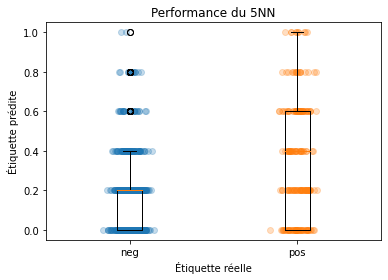

In [113]:
y_test_pos_idx = np.where(y_test==1)[0]
y_test_neg_idx = np.where(y_test==0)[0]

scores_neg = y_pred_5nn_scores[y_test_neg_idx, 1]
scores_pos = y_pred_5nn_scores[y_test_pos_idx, 1]
b = plt.boxplot([scores_neg, scores_pos])

plt.scatter(np.random.normal(1, 0.05, size=len(scores_neg)), scores_neg, alpha=0.25)
plt.scatter(np.random.normal(2, 0.05, size=len(scores_pos)), scores_pos, alpha=0.25)

plt.xticks([1, 2], ['neg', 'pos'])
plt.xlabel('Étiquette réelle')
plt.ylabel('Étiquette prédite')
plt.title("Performance du 5NN")

__Réponse :__ Les étiquettes négatives sont prédites beaucoup plus exactement que les étiquettes positives, comme s'il était plus aisé pour le modèle de reconnaître une étiquette négative que positive avec exactitude. La majorité des étiquettes réelles positives ont été prédites négatives, le modèle a donc du mal à détecter les défaut de paiement. (On observe bien ici les 6 valeurs que peut prendre la fonction de décision).

### 5.5 (Pour aller plus loin) Avec les composantes principales

__Consigne :__ Projetez les données sur le nombre de composantes principales que vous avez choisi dans la section 4, et utilisez ces données-ci pour entrainer un algorithme des 5 plus proches voisins et l'évaluer sur le jeu de test. Comparer ce nouveau modèle à celui obtenu précédemment. Vous pouvez considérer deux variantes : avant et après le prétraitement des données de la section 3.

Attention à bien transformer le jeu de test en le projetant sur les PC calculées sur le jeu d'entraînement.

### 5.6 (Pour aller plus loin) Courbes ROC

Quand la prédiction binaire passe par le seuillage d'une fonction de décision, on peut s'interroger sur la valeur de seuil à utiliser, et chercher à visualiser les performances d'une même fonction de décision selon les différents seuils. 

C'est ce que fait une __courbe ROC__, qui affiche pour chaque seuil possible la sensibilité (aussi appelée rappel ou taux de vrais positifs : il s'agit de (TP/(TP+FN)) vs l'antispécificité (1-spécificité = 1-(TN/(FP+TN)).

Vous pouvez lire [sur OpenClassrooms](https://openclassrooms.com/fr/courses/4297211-evaluez-les-performances-dun-modele-de-machine-learning/4308261-evaluez-un-algorithme-de-classification-qui-retourne-des-scores#/id/r-4336166) en détail comment elle est construite. 

Voici ci-dessous un exemple de code que vous pouvez utiliser pour tracer la courbe ROC pour vos prédictions `y_pred_5nn_scores`.

In [114]:
#[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_5nn_scores[:, 1])

#plt.plot(fpr, tpr, lw=2)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('1 - spécificité')
#plt.ylabel('sensibilité')

## Deuxième partie (après le mercredi 10 juin)
Pour poursuivre le mini-projet, vous allez avoir besoin de compétences et connaissances que vous n'avez pas encore au 20 mai 2020.

## 6. Mise en place d'une validation croisée
La validation croisée vous sera présentée au chapitre 8 et lors de la PC 5 et vous permet de comparer les performances de plusieurs modèles de façon plus satisfaisante qu'une séparation entraînement/test. En particulier, elle permet de « lisser » les particularités qui pourraient être liées à la séparation entraînement/test avec laquelle vous travaillez.

__Consigne :__ sur le même principe que la séparation train/test de la section 1.2, et en vous inspirant de la PC5, mettez en place une validation croisée de `(X_public, y_public)` que vous utiliserez à partir de maintenant.

In [115]:
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

#on refait le preprocessing 
df_dummies = pd.get_dummies(df_public, columns=['Sexe','Education','Statut_marital'] + [f'Statut_mois_{i}' for i in range(1,7)])


X = np.array(df_dummies.drop(columns=['Defaut_de_paiement']))
y = np.array(df_dummies['Defaut_de_paiement'])

#train-test separation
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20,
                                                                    stratify=y, # stratification
                                                                    random_state=92)

#scale continuous features
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_processed = std_scale.transform(X_train)
X_test_processed = std_scale.transform(X_test)

#prepare separation of train in 5 train-validation sets
kf = KFold(n_splits=5, shuffle = True, random_state=92)
#separation will be done in a loop in next part



## 7. Sélection du nombre de plus proches voisins par validation croisée
__Consigne :__ En vous inspirant de la PC5, utilisez maintenant votre validation croisée pour évaluer l'algorithme des 5 plus proches voisins, puis pour sélectionner la valeur optimale du nombre de voisins avec `GridSearchCV`.

Vous pouvez utiliser la grille de valeurs de k suivante, ou la modifier :

In [116]:
from sklearn.model_selection import GridSearchCV

k_values = np.arange(1, 32, step=2)

#mean score between train-validation sets for k neighboors
def mean_score(k):
    
    scores = []
    for i, (train_index, validation_index) in enumerate(kf.split(X_train_processed)):

        # get train and validation dataset
        X_train_i = X_train_processed[train_index]
        X_validation_i = X_train_processed[validation_index]
        y_train_i = y_train[train_index]
        y_validation_i = y_train[validation_index]

        # train model
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X_train_i, y_train_i)

        # measure performance on one train-validation set (here with F1-score weighted)
        y_pred_knn = neigh.predict(X_validation_i)
        F_score = f1_score(y_validation_i, y_pred_knn, average='weighted')
        scores.append(F_score)
        
        #return mean score for k
    return np.mean(scores)

print("le f1-score moyen de la validation croisée pour 5 voisins est", mean_score(5))
print(' ')
#print("le f1-score moyen de la validation croisée pour 9 voisins est", mean_score(11))
print(' ')


#RECHERCHE DU K OPTIMAL :

#avec mean_score "à la main":
scores_k=[mean_score(k) for k in k_values]
print('A la main avec mean_score, le meilleur f1-score moyen vaut', np.amax(scores_k), 'et est atteint pour ', k_values[np.argmax(scores_k)], 'voisins')
print(' ')

#avec GridSearchCV :
n_splits = 5
grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors' : k_values } , scoring = 'f1_weighted', cv=n_splits, refit=False,n_jobs = -1)

results = grid.fit(X_train, y_train)

# get adjusted f1_score
scores = grid.cv_results_['mean_test_score']
scores_std = grid.cv_results_['std_test_score']

# compute standard errors
std_error = scores_std / np.sqrt(n_splits)

print('scores selon k :', scores)
print(' ')
#print('scores std :', scores_std)
#print(' ')
print('Avec le module GridSerachCV, le meilleur f1-score moyen vaut' , results.best_score_, 'et est atteint pour', results.best_params_['n_neighbors'], 'voisins')

le f1-score moyen de la validation croisée pour 5 voisins est 0.7800597313274518
 
 
A la main avec mean_score, le meilleur f1-score moyen vaut 0.7913941420942271 et est atteint pour  11 voisins
 
scores selon k : [0.68449749 0.70484493 0.70518154 0.70320882 0.70566027 0.70126212
 0.70396897 0.70361173 0.69853767 0.6975853  0.69727067 0.69550837
 0.69484935 0.69408023 0.69124475 0.69240586]
 
Avec le module GridSerachCV, le meilleur f1-score moyen vaut 0.7056602731305721 et est atteint pour 9 voisins


__COMMENTAIRE :__ 
Pour 5 voisins, le f-score moyen par validation croisée est presque le même que sans validation croisée trouvé précédemment (0,784 et 0,780), l'échantillonage était donc relativement bon initialement, aidé par la méthode stratify certainement.

Le k optimal est étonnament différent selon si je le cherche à la main avec ma fonction mean_score ou si j'utilise la documentation sklearn, je ne sais pas expliquer la différence mais bien que le score calculé pour k=5 soit meilleur que le max donné par Grid, j'ai tendance à faire confiance à Grid pour conclure que le nombre optimal de voisin est 11. Dans tous les cas, les scores pour k=5 et k=11 sont très proches. En affichant le max pour ma fonction mean_score on trouve même que le k optimal serait 13, il doit y avoir une erreur que je ne comprends pas ou une méthode de calcul différente qui m'est inconnue.

Conclusion : le nombre optimal de voisins retenu est 11.

## 8. Régressions logistiques 
__Consigne :__ En vous inspirant des PC5 et 6, vous pouvez maintenant aussi évaluer et comparer à votre algorithme des plus proches voisins
* une régression logistique 
* une régression logistique régularisée l2
* une régression logistique sparse (i.e. régularisée l1).

Vous trouverez les outils nécessaires dans la classe `LogisticRegression` du module `linear_model` de `scikit-learn` ; il s'agit ainsi d'une variante de la PC5. Comme toujours, référez-vous à la [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

sur les données test, score_log = 0.8231368186874305


Text(0.5, 1.0, 'Performance de la régression logistique')

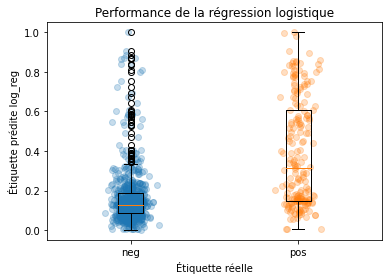

In [117]:
from sklearn.linear_model import LogisticRegression

#processing data
df_dummies = pd.get_dummies(df_public, columns=['Sexe','Education','Statut_marital'] + [f'Statut_mois_{i}' for i in range(1,7)])


X = np.array(df_dummies.drop(columns=['Defaut_de_paiement']))
y = np.array(df_dummies['Defaut_de_paiement'])

#train-test separation
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20,
                                                                    stratify=y, # stratification
                                                                    random_state=92)

#scale continuous features
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_processed = std_scale.transform(X_train)
X_test_processed = std_scale.transform(X_test)


#LOGISTIC REGRESSION
log = LogisticRegression(penalty = 'none', random_state=92, max_iter = 10000).fit(X_train_processed, y_train)
y_pred_log = log.predict(X_test_processed)
y_pred_log_scores = np.array(log.predict_proba(X_test_processed))
#print(y_pred_log_scores.shape, y_pred_log_scores)

score_log = log.score(X_test_processed, y_test)
print('sur les données test, score_log =', score_log)

#visualisation des résultats
y_test_pos_idx = np.where(y_test==1)[0]
y_test_neg_idx = np.where(y_test==0)[0]

scores_neg = y_pred_log_scores[y_test_neg_idx, 1]
scores_pos = y_pred_log_scores[y_test_pos_idx, 1]
b = plt.boxplot([scores_neg, scores_pos])

plt.scatter(np.random.normal(1, 0.05, size=len(scores_neg)), scores_neg, alpha=0.25)
plt.scatter(np.random.normal(2, 0.05, size=len(scores_pos)), scores_pos, alpha=0.25)

plt.xticks([1, 2], ['neg', 'pos'])
plt.xlabel('Étiquette réelle')
plt.ylabel('Étiquette prédite log_reg')
plt.title("Performance de la régression logistique")

 
Grossièrement, le meilleur f1-score moyen vaut 0.7997928563889426 et est atteint pour le coefficient de régularisation lambda = 10.0
 
Apres affinage, le meilleur f1-score moyen vaut 0.7999926185250017 et est atteint pour le coefficient de régularisation lambda = 20.0
 
sur les donnés test, score_log_l2 = 0.8220244716351501


Text(0.5, 1.0, 'Performance de la régression logistique régularisée l2 pour lambda optimal (1/C) : 20.0')

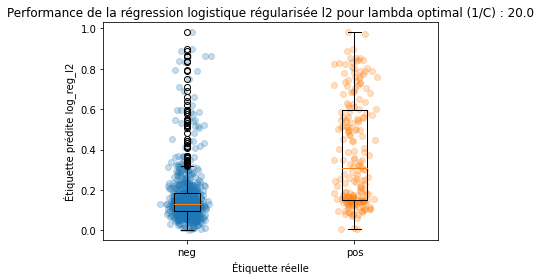

In [118]:
#LOGISTIC REGRESSION REGULARIZED L2

#CHOIX GROSSIER DU COEFFICIENT DE REGULARISATION LAMBDA OPTIMAL (C est l'inverse du coef de régularisation)
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
    
#avec GridSearchCV :
n_splits = 5
grid = GridSearchCV(LogisticRegression(), {'penalty' : ['l2'], 'C' : C_values, 'max_iter' : [10000] } , scoring = 'f1_weighted', cv=n_splits, refit=False,n_jobs = -1)

results = grid.fit(X_train_processed, y_train)

# get adjusted f1_score
scores = grid.cv_results_['mean_test_score']

best_score_l2 = results.best_score_
best_l2_coef = 1/results.best_params_['C']

#print('scores :', scores)
print(' ')
print('Grossièrement, le meilleur f1-score moyen vaut' , best_score_l2, 'et est atteint pour le coefficient de régularisation lambda =', best_l2_coef)

#AFFINAGE DU CHOIX AUTOUR DE L'HYPERPARAMETRE TROUVE
C_values_new = np.linspace(results.best_params_['C']/10, results.best_params_['C']*10, 100)

grid = GridSearchCV(LogisticRegression(), {'penalty' : ['l2'], 'C' : C_values_new, 'max_iter' : [10000] } , scoring = 'f1_weighted', cv=n_splits, refit=False,n_jobs = -1)

results = grid.fit(X_train_processed, y_train)

# get adjusted f1_score
scores = grid.cv_results_['mean_test_score']

best_score_l2 = results.best_score_
best_l2_coef = 1/results.best_params_['C']

#print('scores :', scores)
print(' ')
print('Apres affinage, le meilleur f1-score moyen vaut' , best_score_l2, 'et est atteint pour le coefficient de régularisation lambda =', best_l2_coef)


#représentation avec le meilleur paramètre C (inverse de lambda)
log_l2 = LogisticRegression(penalty = 'l2', C=results.best_params_['C'], random_state=92, max_iter = 10000).fit(X_train_processed, y_train)
y_pred_log_l2 = log_l2.predict(X_test_processed)
#print(y_pred_log_l2)
y_pred_log_l2_scores = np.array(log_l2.predict_proba(X_test_processed))
#print(y_pred_log_l2_scores.shape, y_pred_log_l2_scores)

score_log_l2 = log_l2.score(X_test_processed, y_test)
print(' ')
print('sur les donnés test, score_log_l2 =', score_log_l2)

#visualisation des résultats
y_test_pos_idx = np.where(y_test==1)[0]
y_test_neg_idx = np.where(y_test==0)[0]

scores_neg = y_pred_log_l2_scores[y_test_neg_idx, 1]
scores_pos = y_pred_log_l2_scores[y_test_pos_idx, 1]
b = plt.boxplot([scores_neg, scores_pos])

plt.scatter(np.random.normal(1, 0.05, size=len(scores_neg)), scores_neg, alpha=0.25)
plt.scatter(np.random.normal(2, 0.05, size=len(scores_pos)), scores_pos, alpha=0.25)

plt.xticks([1, 2], ['neg', 'pos'])
plt.xlabel('Étiquette réelle')
plt.ylabel('Étiquette prédite log_reg_l2')
plt.title(f"Performance de la régression logistique régularisée l2 pour lambda optimal (1/C) : {1/results.best_params_['C']}")

 
Grossièrement, le meilleur f1-score moyen vaut 0.8010394594155793 et est atteint pour le coefficient de régularisation lambda = 12.5
 
Après affinage, le meilleur f1-score moyen vaut 0.8012813841042504 et est atteint pour le coefficient de régularisation lambda = 13.888888888888888
 
sur les donnés test, score_log_l1 = 0.8231368186874305


Text(0.5, 1.0, 'Performance de la régression logistique régularisée l1 pour lambda optimal (1/C) : 13.888888888888888')

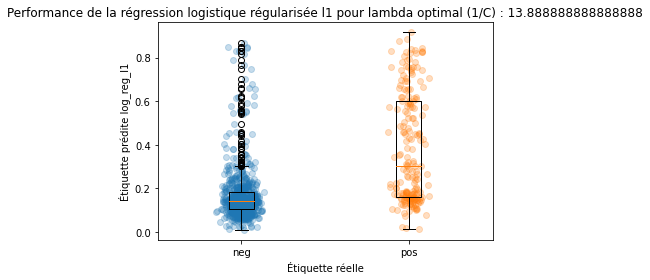

In [119]:
#LOGISTIC REGRESSION REGULARIZED L1

#CHOIX GROSSIER DU COEFFICIENT DE REGULARISATION LAMBDA OPTIMAL
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.08, 0.1, 0.12, 1, 10, 100, 1000, 10000, 100000]
    
#avec GridSearchCV :
n_splits = 5
grid = GridSearchCV(LogisticRegression(), {'penalty' : ['l1'], 'C' : C_values, 'solver' : ['liblinear'], 'max_iter' : [10000] } , scoring = 'f1_weighted', cv=n_splits, refit=False,n_jobs = -1)

results = grid.fit(X_train_processed, y_train)

# get adjusted f1_score
scores = grid.cv_results_['mean_test_score']

best_score_l1 = results.best_score_
best_l1_coef = 1/results.best_params_['C']

#print('scores :', scores)
print(' ')
print('Grossièrement, le meilleur f1-score moyen vaut' , best_score_l1, 'et est atteint pour le coefficient de régularisation lambda =', best_l1_coef)

#AFFINAGE DU CHOIX AUTOUR DE L'HYPERPARAMETRE TROUVE
C_values_new = np.linspace(results.best_params_['C']/10, results.best_params_['C']*10, 100)

grid = GridSearchCV(LogisticRegression(), {'penalty' : ['l1'], 'C' : C_values_new, 'solver' : ['liblinear'], 'max_iter' : [10000] } , scoring = 'f1_weighted', cv=n_splits, refit=False,n_jobs = -1)

results = grid.fit(X_train_processed, y_train)

# get adjusted f1_score
scores = grid.cv_results_['mean_test_score']

best_score_l1 = results.best_score_
best_l1_coef = 1/results.best_params_['C']
best_l1_C = results.best_params_['C']

#print('scores :', scores)
print(' ')
print('Après affinage, le meilleur f1-score moyen vaut' , best_score_l1, 'et est atteint pour le coefficient de régularisation lambda =', best_l1_coef)


#représentation avec le meilleur paramètre C (inverse de lambda)
log_l1 = LogisticRegression(penalty = 'l1', C=results.best_params_['C'], random_state=92, solver = 'liblinear', max_iter = 10000).fit(X_train_processed, y_train)
y_pred_log_l1 = log_l1.predict(X_test_processed)
#print(y_pred_log_l1)
y_pred_log_l1_scores = np.array(log_l1.predict_proba(X_test_processed))
#print(y_pred_log_l1_scores.shape, y_pred_log_l1_scores)

score_log_l1 = log_l1.score(X_test_processed, y_test)
print(' ')
print('sur les donnés test, score_log_l1 =', score_log_l1)

#visualisation des résultats
y_test_pos_idx = np.where(y_test==1)[0]
y_test_neg_idx = np.where(y_test==0)[0]

scores_neg = y_pred_log_l1_scores[y_test_neg_idx, 1]
scores_pos = y_pred_log_l1_scores[y_test_pos_idx, 1]
b = plt.boxplot([scores_neg, scores_pos])

plt.scatter(np.random.normal(1, 0.05, size=len(scores_neg)), scores_neg, alpha=0.25)
plt.scatter(np.random.normal(2, 0.05, size=len(scores_pos)), scores_pos, alpha=0.25)

plt.xticks([1, 2], ['neg', 'pos'])
plt.xlabel('Étiquette réelle')
plt.ylabel('Étiquette prédite log_reg_l1')
plt.title(f"Performance de la régression logistique régularisée l1 pour lambda optimal (1/C) : {1/results.best_params_['C']}")

score_11NN = 0.8164627363737486


Text(0.5, 1.0, 'Performance du 11NN')

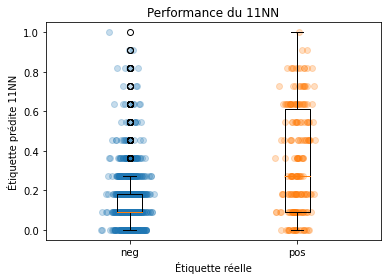

In [120]:
#PERFORMANCE 11NN
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train_processed, y_train)

y_pred_11NN = neigh.predict(X_test_processed)
y_pred_11nn_scores = np.array(neigh.predict_proba(X_test_processed))

F_score_11NN = f1_score(y_test, y_pred_11NN, average='weighted')
score_11NN = neigh.score(X_test_processed, y_test)
#print('F_score_11NN=', F_score_11NN)
print('score_11NN =', score_11NN)

y_test_pos_idx = np.where(y_test==1)[0]
y_test_neg_idx = np.where(y_test==0)[0]

scores_neg = y_pred_11nn_scores[y_test_neg_idx, 1]
scores_pos = y_pred_11nn_scores[y_test_pos_idx, 1]
b = plt.boxplot([scores_neg, scores_pos])

plt.scatter(np.random.normal(1, 0.05, size=len(scores_neg)), scores_neg, alpha=0.25)
plt.scatter(np.random.normal(2, 0.05, size=len(scores_pos)), scores_pos, alpha=0.25)

plt.xticks([1, 2], ['neg', 'pos'])
plt.xlabel('Étiquette réelle')
plt.ylabel('Étiquette prédite 11NN')
plt.title("Performance du 11NN")

In [121]:
from scipy.stats import wilcoxon

#Comparaison statistique des prédictions par les différents modèles
print(wilcoxon(y_pred_11NN, y_pred_log_l1))
print(wilcoxon(y_pred_log_l2, y_pred_log_l1))

WilcoxonResult(statistic=280.0, pvalue=0.7316005889599013)
WilcoxonResult(statistic=32.0, pvalue=0.07070114486598297)


In [122]:
#Visualisation des différents scores optimaux pour choisir le modèle
columns = ["11NN", "log reg", "log reg l2", "log reg l1"]
rows = ["Score avec hyperparamètre optimal"]
data = np.array([[score_11NN, score_log, score_log_l2, score_log_l1]])
df = pd.DataFrame(data=data, index=rows, columns=columns)
print(df)

                                       11NN   log reg  log reg l2  log reg l1
Score avec hyperparamètre optimal  0.816463  0.823137    0.822024    0.823137


__Commentaire :__ 
Pour comparer les algorithmes après cross validation, on regarde le score sur la prédiction des données test, pas encore utilisées. Le meilleur algorithme est la régression logistique avec régularisation l1, pour un hyperparamètre lambda qui vaut 13.9. La régression logistique sans régularisation donne également un bon score mais qui semble changer légèrement quand je run à nouveau les cellules, je choisis donc de laisser ce modèle de côté.

__Conclusion :__ Régression logistique régularisée L1, lambda = 13.9

## 9. Modèle final

Vous êtes maintenant en mesure de __sélectionner votre modèle favori__. Quel pré-traitement apportez vous aux données ? Quel algorithme utilisez vous, avec quel(s) hyper-paramètre(s) ? 

__Consigne :__
* Chargez les données privées de `../data/credit_private.csv`. Ces données ressemblent à celles de `credit_public.csv` mais sans la colonne des étiquettes.
* Appliquez le pré-traitement que vous avez sélectionné à ces données `X_private` pour obtenir `X_private_processed`.
* Appliquez aussi ce pré-traitement à l'intégralité du jeu de données public `X_public` pour obtenir `X_public_processed`.
* Ré-entraînez votre algorithme favori (avec son/ses hyper-paramètre(s)) sur l'intégralité des données publiques (`X_public_processed, y_public`). 
* Enfin, prédisez les étiquettes de `X_private_processed`. Vous pouvez soumettre deux prédictions :
    * `y_private_binary` : vos prédictions binaires 0/1
    * `y_private_scores` : les valeurs de votre fonction de décision, non seuillée.
    
   
La façon de soumettre vos prédictions pour une évaluation « grandeur réelle » de la qualité de votre modèle vous sera précisée ultérieurement.

In [124]:
df_private = pd.read_csv('credit_private.csv', sep='\t')
df_public = pd.read_csv('credit_public.csv', sep='\t')
#print(df_private.head(), df_public.head())
#print(df_public.shape, df_private.shape, df_public.columns)

#il est nécessaire d'obtenir le même encodage one hot pour les deux tables aient le mêmes nombres de colonnes et ainsi 
#leur appliquer fit et predict respectivement (et scale), pour cela il faut que toutes les valeurs de -2 à 8 pour statut_mois_n
#existent dans la table, ce qui n'est pas le cas. J'ajoute donc 11 lignes aux deux tables avec toutes les valeurs possibles de 
#statut_mois_n, procède à l'encodage one hot, pis supprime ces lignes.
for k in range(-2,9):
    new_row_public = {'Credit_total':0, 'Sexe':1, 'Education':1, 'Statut_marital':1, 'Age':0, 
           'Statut_mois_1':k, 'Statut_mois_2':k, 'Statut_mois_3':k, 'Statut_mois_4':k,
           'Statut_mois_5':k, 'Statut_mois_6':k, 'Montant_mois_1':0, 'Montant_mois_2':0,
           'Montant_mois_3':0, 'Montant_mois_4':0, 'Montant_mois_5':0, 'Montant_mois_6':0,
           'Versement_mois_1':0, 'Versement_mois_2':0, 'Versement_mois_3':0,
           'Versement_mois_4':0, 'Versement_mois_5':0, 'Versement_mois_6':0,
           'Defaut_de_paiement':0}
    new_row_private = {'Credit_total':0, 'Sexe':1, 'Education':1, 'Statut_marital':1, 'Age':0, 
           'Statut_mois_1':k, 'Statut_mois_2':k, 'Statut_mois_3':k, 'Statut_mois_4':k,
           'Statut_mois_5':k, 'Statut_mois_6':k, 'Montant_mois_1':0, 'Montant_mois_2':0,
           'Montant_mois_3':0, 'Montant_mois_4':0, 'Montant_mois_5':0, 'Montant_mois_6':0,
           'Versement_mois_1':0, 'Versement_mois_2':0, 'Versement_mois_3':0,
           'Versement_mois_4':0, 'Versement_mois_5':0, 'Versement_mois_6':0}
    #append row to the dataframe
    df_private = df_private.append(new_row_private, ignore_index=True)
    df_public = df_public.append(new_row_public, ignore_index=True)


#PREPROCESSING
#same preprocessing, one hot encoder and standard scaler
#one hot encoder for discrete features
df_dummies_public = pd.get_dummies(df_public, columns=['Sexe','Education','Statut_marital'] + [f'Statut_mois_{i}' for i in range(1,7)])
df_dummies_private = pd.get_dummies(df_private, columns=['Sexe','Education','Statut_marital'] + [f'Statut_mois_{i}' for i in range(1,7)])

#suppression des 11 lignes ajoutées artificiellement
df_dummies_public = df_dummies_public[:-11]
df_dummies_private = df_dummies_private[:-11]

#on vérifie qu'on a bien retrouvé le même nombre d'individu dans les nouvelles tables que dans celles de départ
#print(df_dummies_public.shape, df_dummies_private.shape, df_dummies_public.columns, df_dummies_private.columns)

X_private_one_hot = np.array(df_dummies_private)
X_public_one_hot = np.array(df_dummies_public.drop(columns=['Defaut_de_paiement']))
y_public = np.array(df_dummies_public['Defaut_de_paiement'])

#scale continuous features
std_scale = preprocessing.StandardScaler().fit(X_public_one_hot)
X_private_processed = std_scale.transform(X_private_one_hot)
X_public_processed = std_scale.transform(X_public_one_hot)

#----------------------------------
#TRAINING LOGREG-L1 with C=13.9
print("l'hyperparamètre optimal choisi est lambda =", 1/best_l1_C)
model = LogisticRegression(penalty = 'l1', C=best_l1_C, random_state=92, solver = 'liblinear', max_iter = 10000).fit(X_public_processed, y_public)
y_private_binary = model.predict(X_private_processed)
y_private_scores = np.array(model.predict_proba(X_private_processed))
#selectionne seulement la probabilité de défaut
y_private_scores = y_private_scores[:,1]
#print(y_private_binary, y_private_scores)

#SAUVEGARDE DE LA TABLE DE PREDICTION FINALE
#Reshape 1-dimensional arrays to 2-dimensional and stack them in the same array 
y_array_final = np.hstack((y_private_binary.reshape((y_private_binary.shape[0], 1)), 
                           y_private_scores.reshape((y_private_scores.shape[0], 1))))

print(y_array_final)

# Save array to file
np.savetxt('predictions_HENNION.csv',
           y_array_final, fmt=('%d', '%.3f'), 
           header='Prediction_binaire,Prediction_score', 
           delimiter=',', 
           comments='')

#df_final = pd.DataFrame(data = y_array_final, columns = ['Prediction_binaire', 'Prediction_score'])
#print(df_final)

l'hyperparamètre optimal choisi est lambda = 13.888888888888888
[[0.         0.13740636]
 [0.         0.12618792]
 [0.         0.14841927]
 ...
 [0.         0.09573736]
 [0.         0.222815  ]
 [1.         0.72097346]]


__Pensez-vous qu'un réseau de neurones profond puisse être adapté au problème ?__

Le deep learning permet des performances accrues en machine learning, mais la complexité des structures à neurones profonds pose un principal problème : le surapprentissage. Pour qu'un tel modèle soit efficace il faut donc un grand nombre de données. La table que nous cherchons à prédire contiennent de l'ordre du millier d'individus, il faudrait alors pour éviter le surapprentissage un table d'entrainement de l'ordre du million d'individu, ce n'est pas le cas ici (environ 3000) et cela reste difficilement envisageable pour une banque nationale d'avoir accès à autant de données client précises. Le risque de surappentissage est donc trop élevé et les méthodes présentées ci-dessus sont certainement plus adaptées à notre petit jeu de données plutôt que de mettre en place un réseau de neurones profond.

## 10. Pour aller plus loin

1) Vous pouvez aussi essayer d'entraîner des forêts aléatoires ou des machines à vecteurs de support sur vos données. Ces méthodes vous seront présentées brièvement au chapitre 9. 
En plus de la documentation de `scikit-learn`, vous pouvez vous référer à OpenClassrooms :
* [Pour les forêts aléatoires](https://openclassrooms.com/fr/courses/4470521-modelisez-vos-donnees-avec-les-methodes-ensemblistes/4664690-tp-mesurez-la-puissance-des-forets-aleatoires).
* [Pour les machines à vecteur de support](https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires/4722466-classifiez-vos-donnees-avec-une-svm-a-noyau#/id/r-4880828).
    
2) Vous pouvez appliquer des méthodes de __sélection de variables__ à vos données avant l'apprentissage. Par exemple :
* Conserver uniquement les variables apparaissant dans une régression logistique sparse
* Conserver uniquement les variables qui sont liées à l'étiquette : vous pouvez effectuer un test du chi2 (voir PC1) pour les variables catégoriques ou un test t de Student pour comparer, entre deux groupes définis par la valeurs de l'étiquette, les moyennes d'une variable quantitative (attention, ce test suppose que la variable quantitative suit une distribution normale dans les deux groupes).

3) Vous pouvez passer beaucoup plus de temps à __pré-traiter__ vos données. Par exemple, voulez-vous utiliser les 6 valeurs des 6 derniers mois, ou leur minimum, ou leur moyenne ? Peut-être croiser les variables `Sexe` et `Statut_marital` pour obtenir une variable qualitative avec les catégories "femme mariée", "homme célibataire", etc. 